<a href="https://colab.research.google.com/github/CowPeas/multi-modal-transformers/blob/master/Housing_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install openai==0.27.0


In [ ]:
!pip install lazypredict


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
!pip install faiss-cpu==1.7.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 66.7 MB/s eta 0:00:00


In [ ]:
pip install transformers torch


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:

import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
#import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [ ]:
from google.colab import files
#uploaded = files.upload()


import pandas as pd

df = pd.read_csv('data.csv')


In [ ]:
df.shape

(22059, 16)

In [ ]:
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [ ]:
# Feature engineering
df['min_nights_x_avail'] = df['minimum_nights'] * df['availability_365']

features = ['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
            'room_type', 'minimum_nights', 'number_of_reviews',
            'reviews_per_month', 'calculated_host_listings_count',
            'availability_365', 'min_nights_x_avail']

target = 'price'

In [ ]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Handle categorical variables using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le



In [ ]:
# Convert the target variable to a classification problem
# Here, we classify the price into categories: Low, Medium, High
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])

In [ ]:
# Update the target variable to use the categorical price
target = 'price_category'

In [ ]:
X = df[features]
y = df[target]
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate all models
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)

 90%|████████▉ | 26/29 [02:52<00:23,  7.82s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1788
[LightGBM] [Info] Number of data points in the train set: 17647, number of used features: 11
[LightGBM] [Info] Start training from score -1.189179
[LightGBM] [Info] Start training from score -1.057045
[LightGBM] [Info] Start training from score -1.055415


100%|██████████| 29/29 [02:53<00:00,  5.97s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.68               0.68    None      0.68   
RandomForestClassifier             0.67               0.67    None      0.67   
NuSVC                              0.67               0.67    None      0.66   
SVC                                0.67               0.67    None      0.66   
BaggingClassifier                  0.66               0.66    None      0.65   
AdaBoostClassifier                 0.66               0.66    None      0.66   
ExtraTreesClassifier               0.65               0.65    None      0.65   
LogisticRegression                 0.63               0.64    None      0.61   
LabelSpreading                     0.63               0.63    None      0.63   
LinearDiscriminantAnalysis         0.63               0.63    None      0.60   
CalibratedClassifierCV             0.63 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
dfp = pd.read_csv('data.csv')

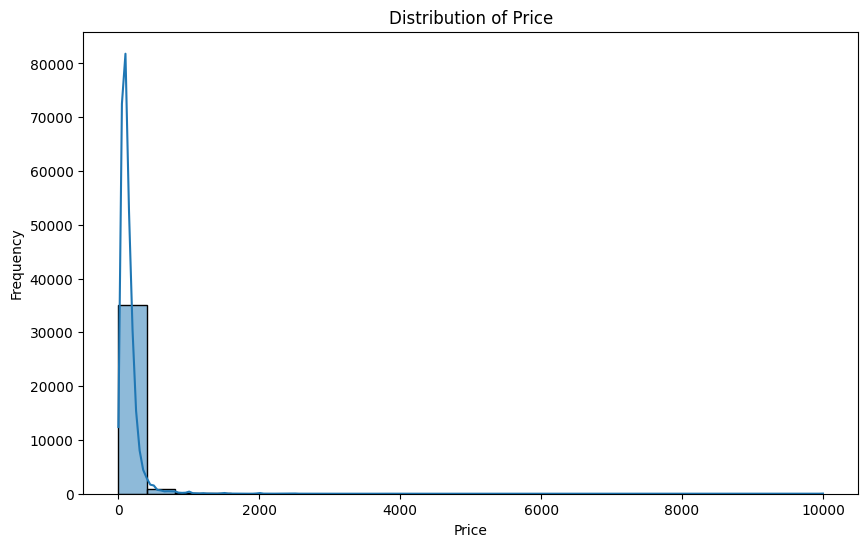

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dfp['price'], bins=25, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


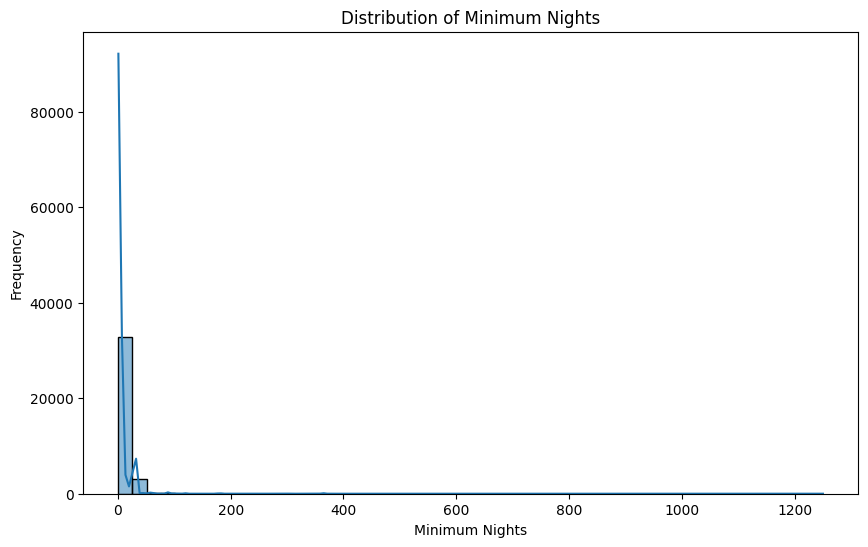

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dfp['minimum_nights'], bins=50, kde=True)
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.show()


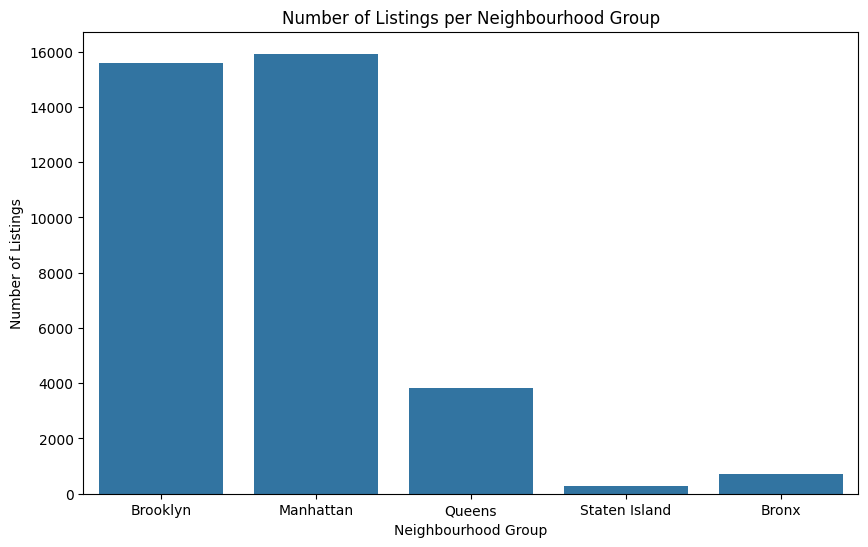

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dfp, x='neighbourhood_group')
plt.title('Number of Listings per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.show()


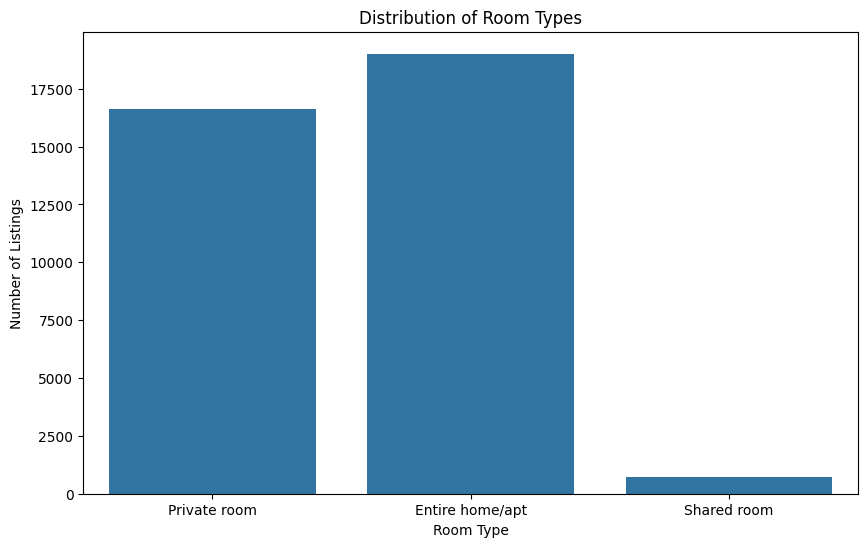

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dfp, x='room_type')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()


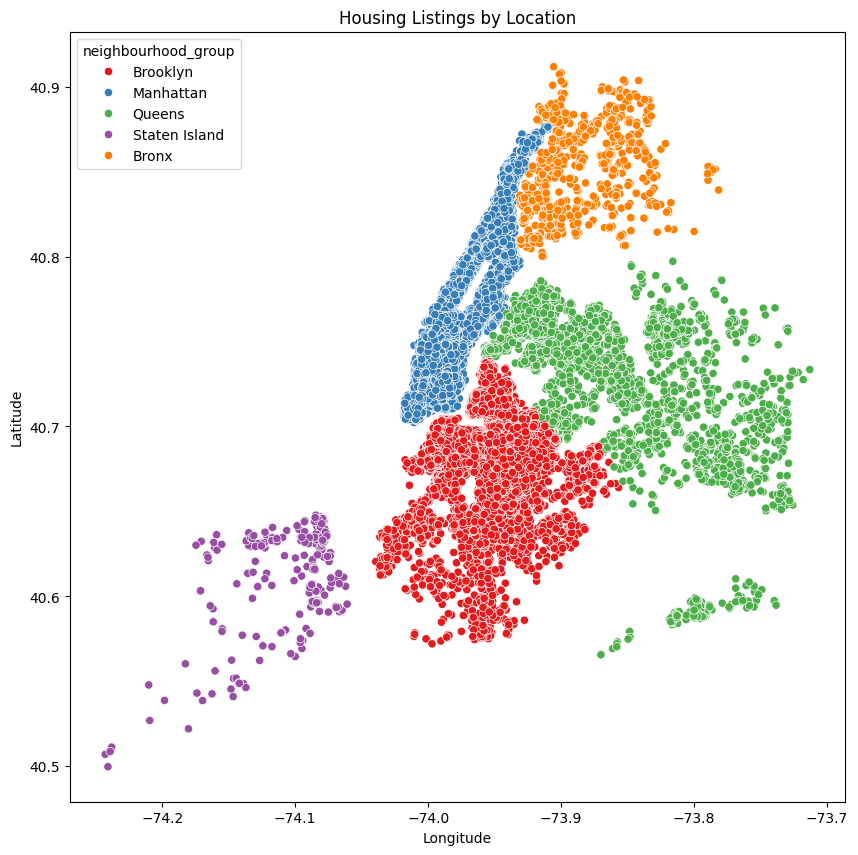

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=dfp, palette='Set1')
plt.title('Housing Listings by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


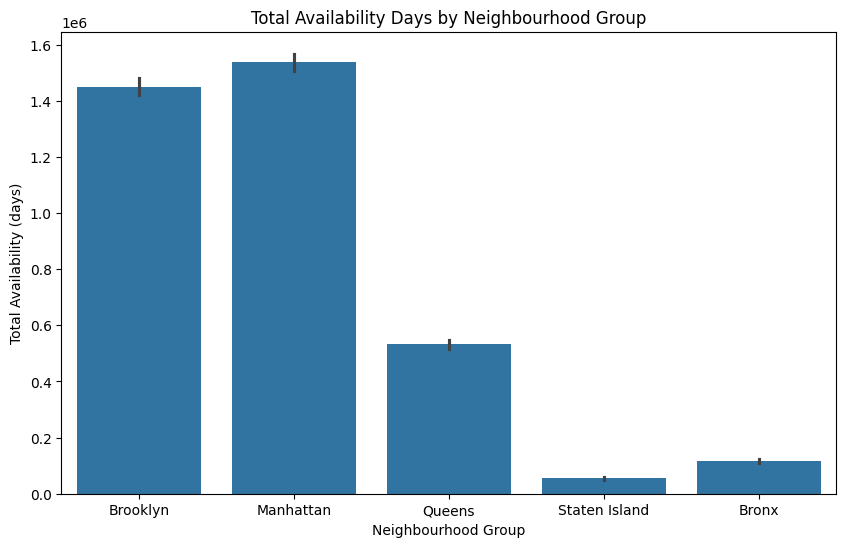

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='availability_365', data=dfp, estimator=sum)
plt.title('Total Availability Days by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Availability (days)')
plt.show()


In [ ]:
import os; os.environ['OPENAI_API_KEY'] =  'OPENAI_API_KEY'

In [ ]:
df2 = pd.read_csv('data.csv')
#
# Concatenate all columns to create a single string representation for each row
df2['combined'] = df2.apply(lambda row: ' | '.join(row.values.astype(str)), axis=1)

# View the combined data
print(df2['combined'].head())

0    2539 | Clean & quiet apt home by the park | 27...
1    2595 | Skylit Midtown Castle | 2845 | Jennifer...
2    3647 | THE VILLAGE OF HARLEM....NEW YORK ! | 4...
3    3831 | Cozy Entire Floor of Brownstone | 4869 ...
4    5022 | Entire Apt: Spacious Studio/Loft by cen...
Name: combined, dtype: object


In [ ]:
import pandas as pd
import torch
from transformers import BertModel, BertTokenizer

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Ensure the model is in evaluation mode and move to GPU if available
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to generate BERT embeddings
def get_bert_embedding(text):
    # Tokenize the input text and create a tensor
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    # Forward pass through BERT
    with torch.no_grad():
        outputs = model(**inputs)

    # Use the [CLS] token representation as the embedding
    # CLS token is the first token of the sequence, output[0][:,0,:] grabs that
    embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
    return embedding.flatten()

# Apply the function to each row in the DataFrame
df2['embedding'] = df2['combined'].apply(get_bert_embedding)

# Convert embeddings to a list for later use
embeddings = df2['embedding'].tolist()

KeyboardInterrupt: 

In [ ]:
import faiss
import numpy as np
# Initialize the FAISS index
embedding_dim = len(embeddings[0])
index = faiss.IndexFlatL2(embedding_dim)  # L2 distance (Euclidean distance)

# Convert embeddings to a numpy array and add to the FAISS index
index.add(np.array(embeddings).astype(np.float32))

# Check the number of vectors indexed
print(f"Number of vectors indexed: {index.ntotal}")

Number of vectors indexed: 48895


In [ ]:
def search(query, k=5):
    # Generate the query embedding
    query_embedding = get_bert_embedding(query).astype(np.float32).reshape(1, -1)

    # Search the index for similar vectors
    distances, indices = index.search(query_embedding, k)

    # Retrieve and return the corresponding rows from the dataframe
    results = df2.iloc[indices[0]]
    return results

# Example search query
query = "What are the listings with the lowest price?"
results = search(query)

# Display results
print(results[['combined', 'price']])

                                                combined  price
40608  31490659 | ‘’AROUND THE CORNER’’  QUEENS, NY |...     90
3074   1815211 | :: Spacious 1bedroom, great loca :: ...    185
46219  35156439 | Our lovely 3 Bedroom in the Upper E...    279
44377  34203618 | Well lit room in FiDi, Manhattan-Ju...     52
19361  15450257 | A home away from home in the heart ...    125


In [ ]:
pip install tabulate termcolor


In [ ]:
import pandas as pd
from tabulate import tabulate  # For table formatting
from termcolor import colored  # For color formatting

def search(query):
   #Generate some random samples
    return df2.sample(5)  # For demonstration, returning 5 random samples

while True:
    # Get user query input
    query = input(colored("Ask your CSV (type 'exit' to quit): ", 'green'))

    # Exit option
    if query.lower() == 'exit':
        print(colored("Exiting...", 'yellow'))
        break

    # If query is empty, prompt the user to enter a valid query
    if not query.strip():
        print(colored("Please enter a valid query.", 'red'))
        continue

    # Perform the search
    results = search(query)

    # Display the results in a table format
    print(colored("\nClosest matches:", 'blue', attrs=['bold']))
    print(tabulate(results[['combined', 'price']], headers='keys', tablefmt='fancy_grid', showindex=False))

    #Add some space before the next prompt
    print("\n" + "-"*50 + "\n")



Ask your CSV (type 'exit' to quit): What is the cheapest house in the bronx

Closest matches:
╒══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════╕
│ combined                                                                                                                                                                                         │   price │
╞══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═════════╡
│ 5363874 | 2br Duplex w/Roof Deck Close to Empire State Build | 17982486 | Cheri | Manhattan | Kips Bay | 40.74205 | -73.97997 | Entire home/apt | 250 | 30 | 13 | 2018-04-30 | 0.25 | 1 | 274    │     250 │
├─────────────────────────────────────────────────────────────────────────────

In [ ]:
import requests
from IPython.display import Audio
response = requests.post(
    "https://api.openai.com/v1/audio/speech",
    headers={
        "Authorization": f"Bearer {os.environ['OPENAI_API_KEY']}",
    },
    json={
        "model": "tts-1-1106",
        "input": "I am Derrick Macharia and in this notebook We embarked on a wild data adventure, taking a humble CSV file of Housing listings and turning it into a chatty companion using bert open embeddings and FAISS for vector search. Imagine asking your data, Show me the cheapest digs in NYC! and it happily spills the beans with a list of budget-friendly options. We started by coaxing each row of data into a single, chatty line of text, then juiced it up with AI to generate embeddings—a fancy way of making the data understand our questions. But before this, we dabbled in predicting prices with various models , the lgbmclassifier and random forest classifier being the best. This shows an lgbmclassifier  model is the best to be used to predict the actual prices but nothing beats a good conversation, right? We also did some data exploration using the plots showing us various distributions that lead to interesting questions like 'why are there few listings in the bronx'. Now, what started as a boring spreadsheet is a lively, interactive tool, ready to dish out insights at the drop of a question. Man, I love AI",
        "voice": "alloy",
    },
)

audio = b""
for chunk in response.iter_content(chunk_size=1024 * 1024):
    audio += chunk
Audio(audio)